In [39]:
import DataPrep as dtp

import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import make_blobs
import seaborn as sns 




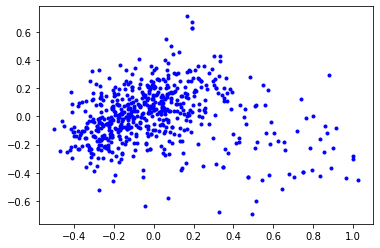

In [2]:
df_norm = dtp.doAllMedianNaanFix('spotifyData.csv')
data = df_norm.iloc[:, 4:]
reduced_data = dtp.kpca_reduction( data)

plt.figure()
plt.plot(reduced_data[:, [0]] , reduced_data[:, [1]], linestyle = 'none',
             marker = 'o', markersize = 3, color="blue" )
plt.show()

In [3]:
distortions = []
inertias = []

k_vals = range(1, 10)
 
for k in k_vals:
    medoid_model  = KMedoids(n_clusters=k).fit(data)
 
    distortions.append(sum(np.min(cdist(data, medoid_model.cluster_centers_,
                                        'euclidean'), axis=1)) / data.shape[0])
    inertias.append(medoid_model.inertia_)

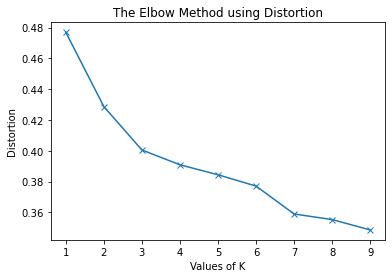

In [4]:
plt.plot(k_vals, distortions, 'x-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

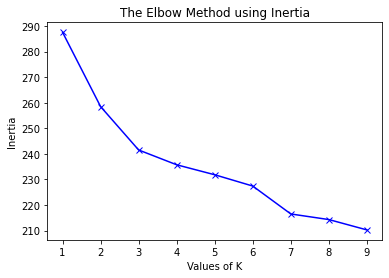

In [5]:
plt.plot(k_vals, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

we chose the elbow point as being k=7

In [6]:
k=7
cmap = cm.get_cmap('hsv')
colors = [cmap(i) for i in np.linspace(0,1,k)]
opti_medoid = KMedoids(n_clusters=k).fit(data)

We visualize our clusters in 2D using k-PCA

Text(0.5, 1.0, 'KMedoids clustering using optimal value of k')

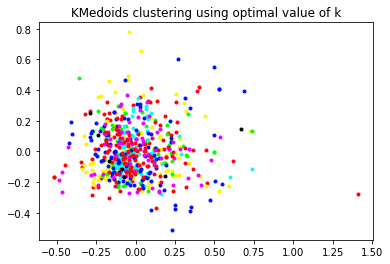

In [7]:
labels = opti_medoid.labels_
unique_labels = set(labels)
data_clusters=[]

for k, col in zip(unique_labels, colors):

    class_members = labels == k

    x = data[class_members]
    data_clusters.append(x)
    x_reduced = dtp.kpca_reduction(x)
    plt.plot(
        x_reduced[:, 0], x_reduced[:, 1],
        linestyle = 'none', marker = 'o', markersize = 3, color=col
)

centers_reduced = dtp.kpca_reduction(opti_medoid.cluster_centers_)
plt.plot(
    centers_reduced[:, 0], centers_reduced[:, 1], 
    linestyle = 'none', marker = 'o', markersize = 3, color="black"
)

plt.title("KMedoids clustering using optimal value of k")


In [90]:
df_clusters=[]
for i in range(0,k+1):
    indexes = list(data_clusters[i].index.values) 
    df_clusters.append( df_norm.iloc[indexes] ) 

df_cluster_genres=[]
for i in range(0,k+1):
    df0  = df_clusters[i]['genre'].value_counts().to_frame()
    df0 = df0.reset_index().rename(columns={'genre': str(i+1), 'index': 'cluster'}).T
    df_cluster_genres.append(df0)

result = pd.concat(df_cluster_genres)
result

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
cluster,dance pop,neo mellow,pop,canadian pop,british soul,art pop,hip pop,hip hop,detroit hip hop,australian dance,...,boy band,barbadian pop,alaska indie,permanent wave,acoustic pop,electropop,NaN,NaN,NaN,NaN
1,11,6,6,6,4,4,2,1,1,1,...,1,1,1,1,1,1,NaN,NaN,NaN,NaN
cluster,dance pop,pop,boy band,canadian pop,australian pop,indie pop,candy pop,edm,detroit hip hop,barbadian pop,...,australian dance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,59,14,5,5,3,2,2,2,1,1,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cluster,dance pop,canadian pop,pop,boy band,electropop,big room,british soul,complextro,tropical house,barbadian pop,...,canadian contemporary r&b,downtempo,australian dance,australian hip hop,hollywood,atl hip hop,hip pop,art pop,baroque pop,escape room
3,39,5,5,4,4,4,3,3,2,2,...,2,1,1,1,1,1,1,1,1,1
cluster,dance pop,pop,big room,canadian pop,boy band,complextro,barbadian pop,belgian edm,electropop,edm,...,contemporary country,electro house,australian dance,canadian contemporary r&b,house,celtic rock,british soul,hip pop,latin,NaN
4,38,8,4,4,3,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,NaN
cluster,dance pop,pop,canadian pop,art pop,barbadian pop,atl hip hop,latin,permanent wave,electropop,moroccan pop,...,british soul,canadian hip hop,hip pop,hip hop,tropical house,boy band,metropopolis,chicago rap,australian pop,alternative r&b
5,77,11,5,3,3,3,2,2,1,1,...,1,1,1,1,1,1,1,1,1,1
